# K Nearest Neighbors Project 

Welcome to the KNN Project! 
## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [60]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data
** Read the 'KNN_Project_Data csv file into a dataframe **

In [61]:
data_frame = pd.read_csv('KNN_Project_Data')

**Check the head of the dataframe.**

In [62]:
data_frame.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

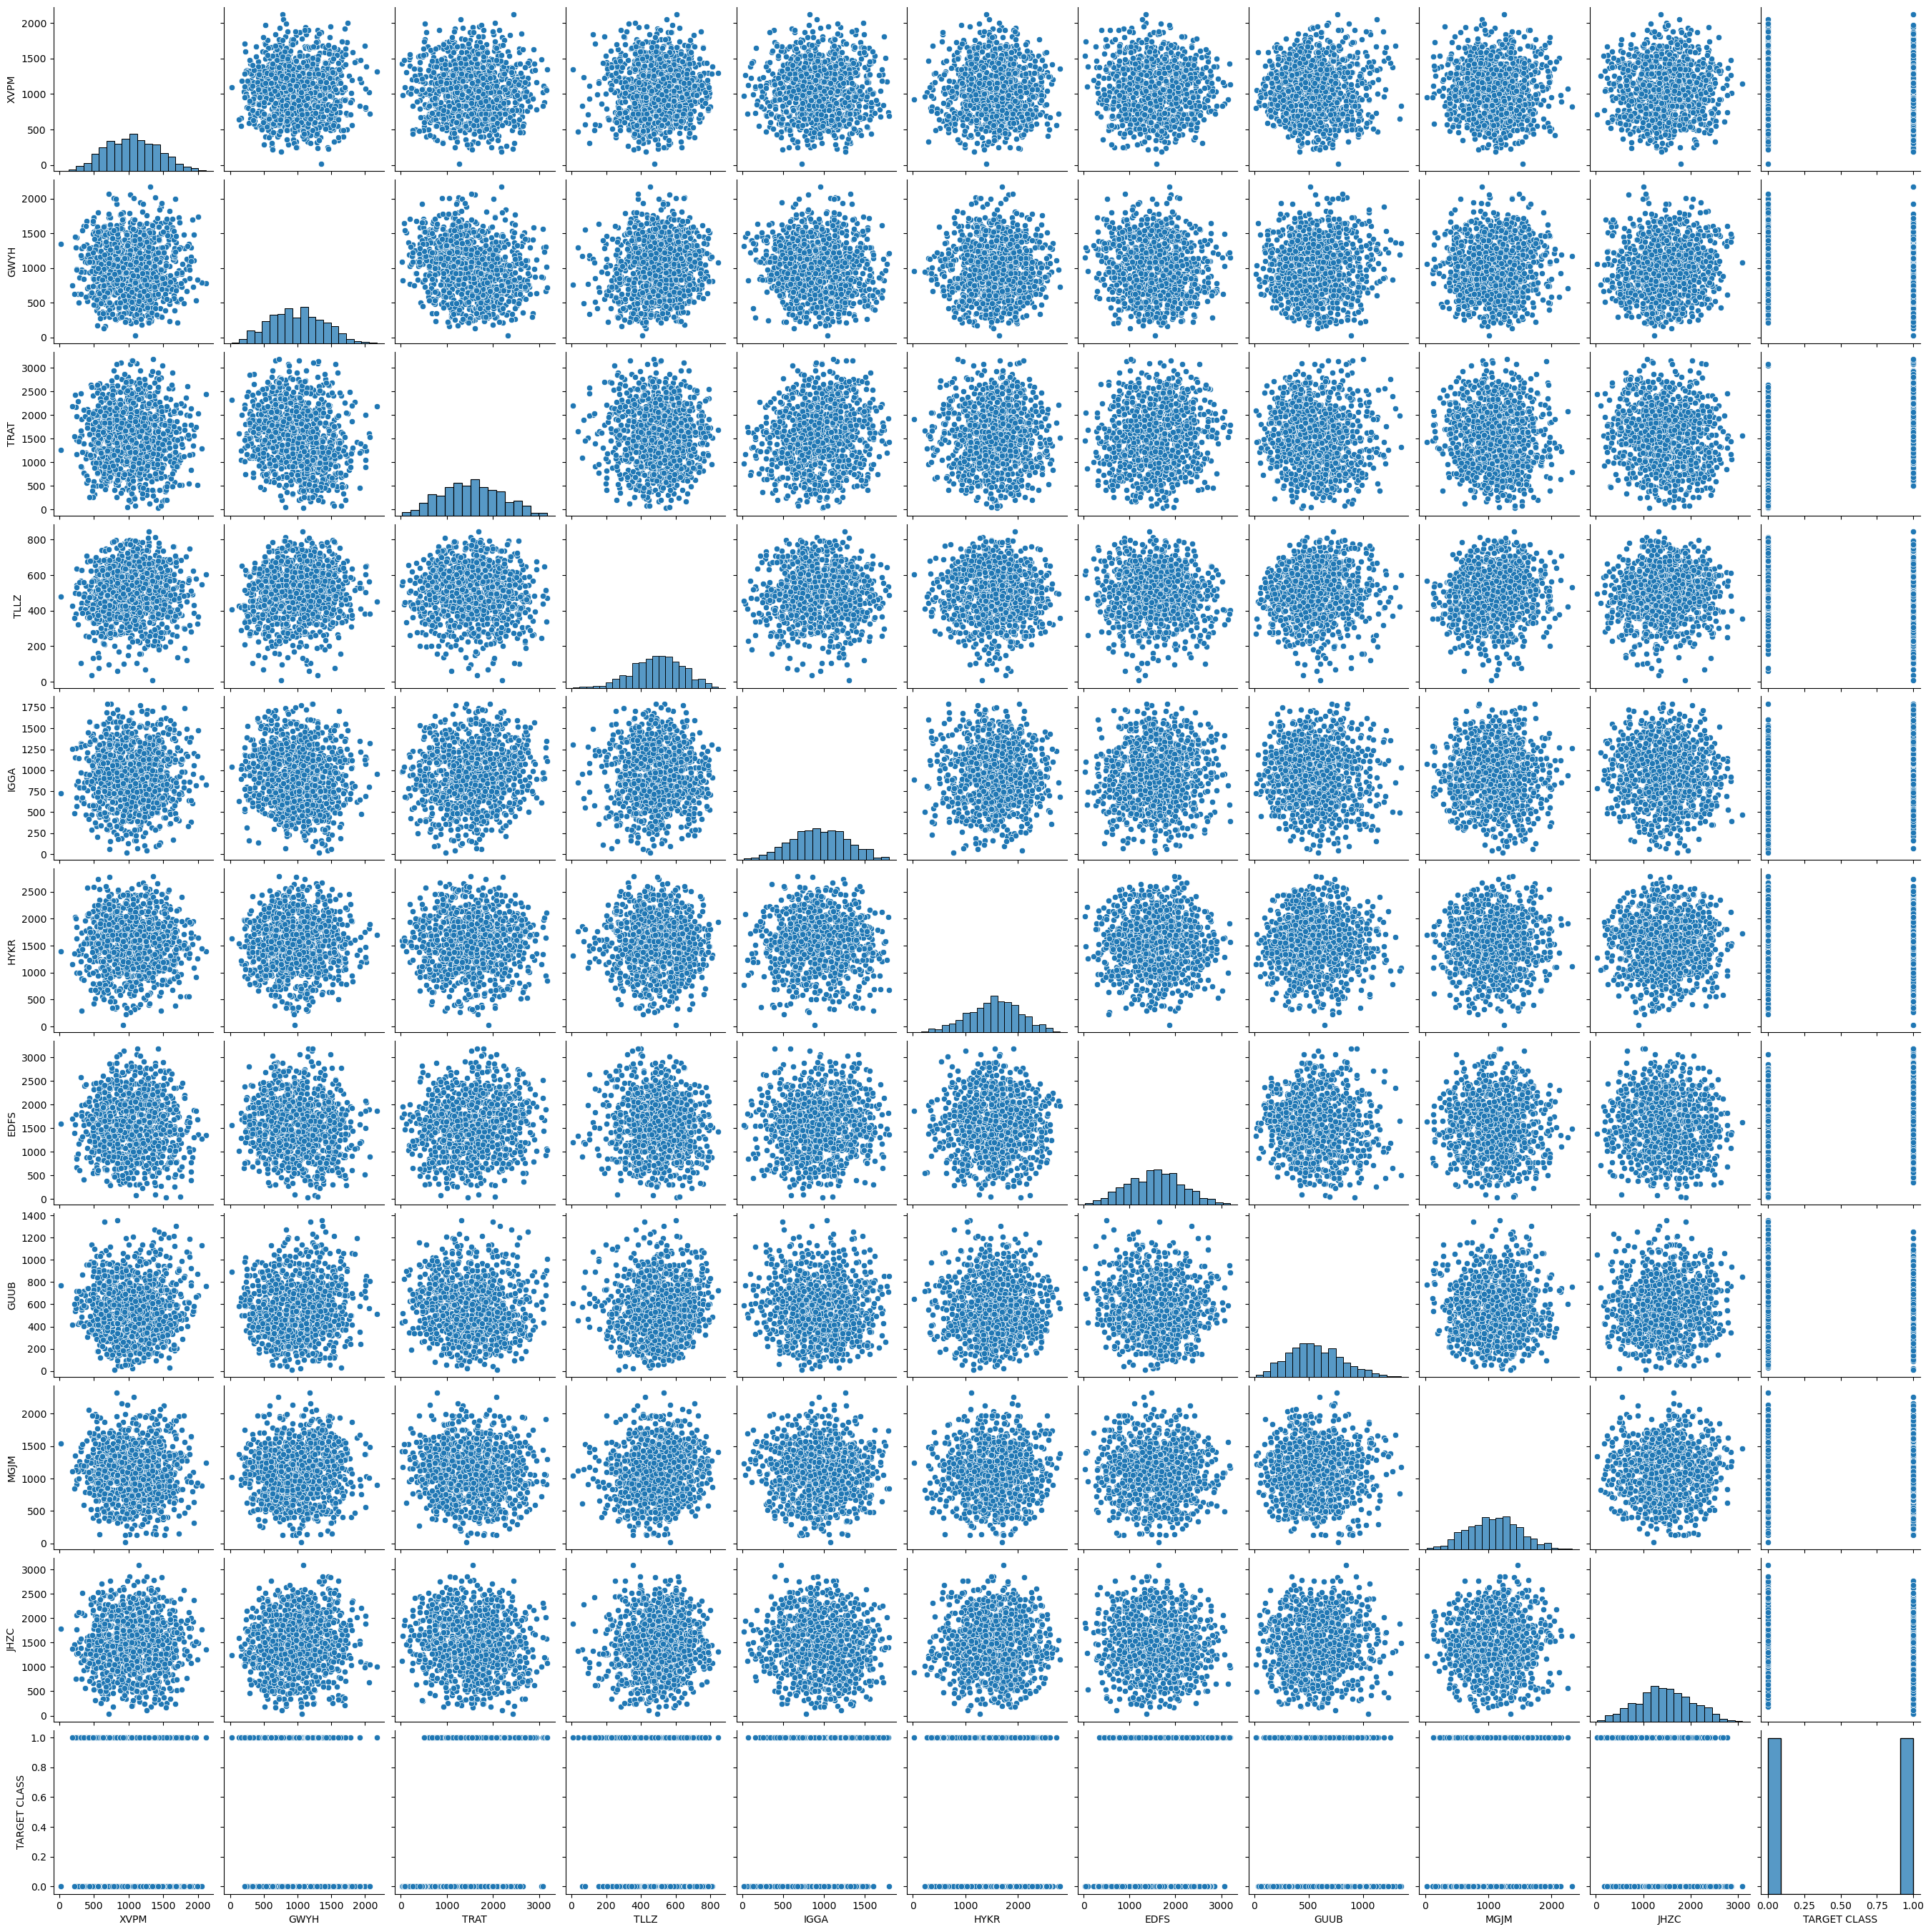

In [63]:
sns.pairplot(data_frame)

# Standardize the Variables

Time to standardize the variables.

** Import StandardScaler from Scikit learn.**

In [64]:
from sklearn.preprocessing import StandardScaler

** Create a StandardScaler() object called scaler.**

In [65]:
scaler = StandardScaler()

** Fit scaler to the features.**

In [66]:
from sklearn.model_selection import train_test_split,cross_val_score
X = data_frame.drop('TARGET CLASS',axis=1)
y=data_frame["TARGET CLASS"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=101)


**Use the .transform() method to transform the features to a scaled version.**

In [67]:

# Fit the scaler only on the training data
scaler.fit(X_train)  # get mean and std for each feature and store it for tranform method

# Transform both the training and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [68]:
# # Convert to DataFrame for better readability (optional)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [69]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [70]:
knn = KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [71]:
knn.fit(X_train_scaled_df,y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [72]:
pred_y = knn.predict(X_test_scaled_df)
pred_y

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,

** Create a confusion matrix and classification report.**

In [73]:
from sklearn.metrics import classification_report,confusion_matrix

In [74]:
confusion_matrix(y_test,pred_y)

array([[116,  46],
       [ 48, 120]])

In [75]:
print(classification_report(y_test,pred_y))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71       162
           1       0.72      0.71      0.72       168

    accuracy                           0.72       330
   macro avg       0.72      0.72      0.72       330
weighted avg       0.72      0.72      0.72       330



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [76]:
error_rate = []
for x in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=x)
    knn.fit(X_train_scaled_df,y_train)
    pred_y = knn.predict(X_test_scaled_df)
    error_rate.append(np.mean(pred_y != y_test))
   
    

**Now create the following plot using the information from your for loop.**

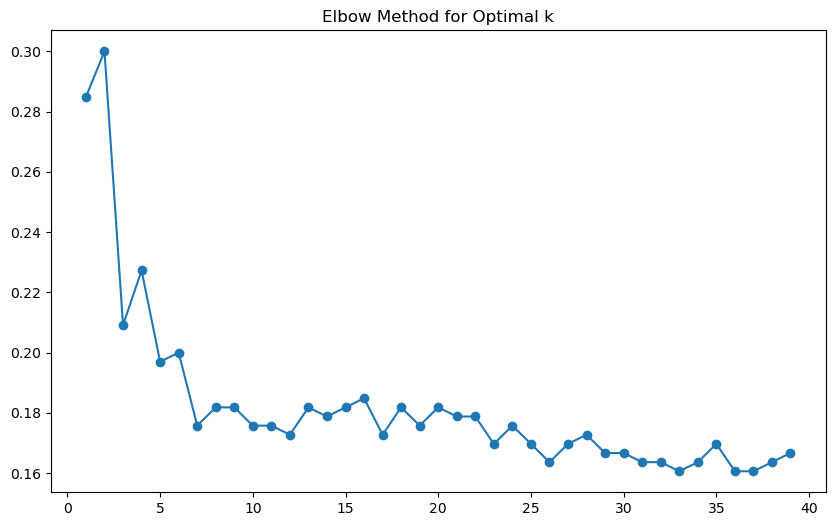

In [77]:
plt.figure(figsize=(10, 6))
plt.plot(range(1,40), error_rate, marker='o')
plt.title('Elbow Method for Optimal k')
plt.show()

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [83]:
knn = KNeighborsClassifier(n_neighbors=38)
knn.fit(X_train_scaled_df,y_train)
pred_y = knn.predict(X_test_scaled_df)


In [84]:
confusion_matrix(y_test,pred_y)

array([[136,  26],
       [ 28, 140]])

In [85]:
print(classification_report(y_test,pred_y))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       162
           1       0.84      0.83      0.84       168

    accuracy                           0.84       330
   macro avg       0.84      0.84      0.84       330
weighted avg       0.84      0.84      0.84       330



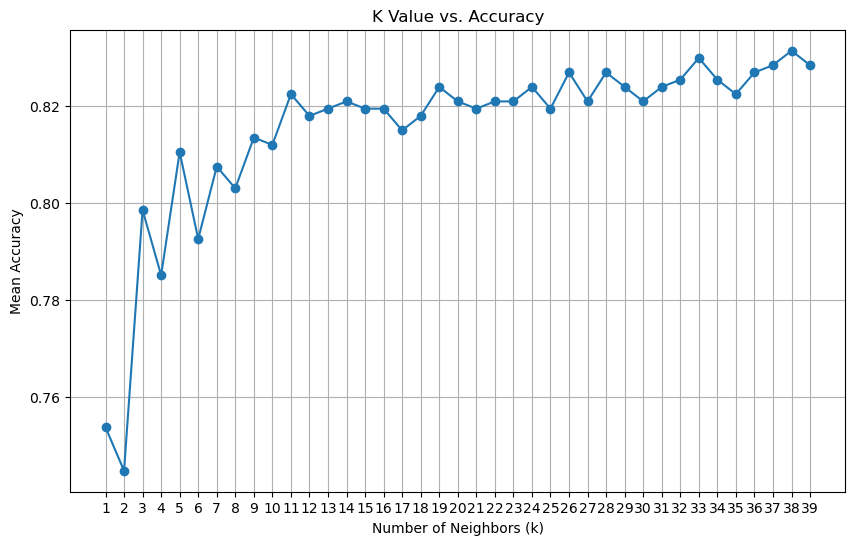

The best value of k is: 38


In [82]:
# another method to find the best k value  
k_values = range(1, 40)  # Testing k values from 1 to 40
mean_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled_df, y_train, cv=5, scoring='accuracy')
    mean_accuracies.append(scores.mean())

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_accuracies, marker='o')
plt.title('K Value vs. Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()
# we have to find the best value of the k from the elbow method
best_k = k_values[np.argmax(mean_accuracies)]
print(f"The best value of k is: {best_k}")

# Great Job!